# Topic Modeling on Tweets with Hate Speech

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from dataset.dataset import Dataset
from constants import *

from bertopic import BERTopic
import nbformat

from gensim.models import Nmf, TfidfModel
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel

/Users/cayasryan/.pyenv/versions/3.11.2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
RANDOM_SEED = 0

In [4]:
dataset = Dataset(full_data_path='dataset/cleaned_dataset_v1.pkl',
                  from_scratch=False,
                  split_sizes=[8993, 3957, 4099])
dataset.build()

X_train = dataset.get_features(split_type="train")
Y_train = dataset.get_labels(split_type="train")
X_val = dataset.get_features(split_type="val")
Y_val = dataset.get_labels(split_type="val")
X_test = dataset.get_features(split_type="test")
Y_test = dataset.get_labels(split_type="test")

Data loaded from dataset/cleaned_dataset_v1.pkl


## BERTopic - All Tweets

In [13]:
topic_model = BERTopic(nr_topics='auto')
topics, probs = topic_model.fit_transform(X_train)
topic_model.get_topic_info()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


,Topic,Count,Name,Representation,Representative_Docs
0,-1,3116,-1_roxas_mar_duterte_binay,"[roxas, mar, duterte, binay, not, poe, di, via...",[di man duterte miriam president mar roxas pls...
1,0,2670,0_binay_commercial_hindi_vp,"[binay, commercial, hindi, vp, mar, di, makati...",[nakaka beastmode tv ads binay hindi maitim hi...
2,1,557,1_corruption_binay_not_vp,"[corruption, binay, not, vp, allegations, like...","[binay stop corruption, anc senate blue ribbon..."
3,2,363,2_mar_roxas_desperate_win,"[mar, roxas, desperate, win, not, vote, place,...","[vote mar roxas, desperate mar roxas, mar roxa..."
4,3,289,3_poe_grace_sen_duterte,"[poe, grace, sen, duterte, hindi, mag, miriam,...","[grace poe pagbabago bansa, sec mar mag give w..."
...,...,...,...,...,...
57,56,11,56_ateneo_mac_belo_pht,"[ateneo, mac, belo, pht, smmanila, rocks, gimm...",[ateneo mac belo sarah geronimo minamahal gimm...
58,57,11,57_twodaysto_majasty_pht_hakotawards,"[twodaysto, majasty, pht, hakotawards, byron, ...",[trending philippines pht hakotawards darren t...
59,58,11,58_gomez_guia_mayor_juan,"[gomez, guia, mayor, juan, san, inendorso, rom...","[mar roxas inendorso mayor guia gomez ulat, sa..."
60,59,10,59_skin_touches_color_hey,"[skin, touches, color, hey, anew, uncalled, ha...",[ideal slogan binay binay touches skin touches...


In [17]:
topic_model.visualize_topics() 

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array([[0, 'binay | commercial | hindi | vp | mar', 2670],
                                   [1, 'corruption | binay | not | vp | allegations', 557],
                                   [2, 'mar | roxas | desperate | win | not', 363],
                                   [3, 'poe | grace | sen | duterte | hindi', 289],
                                   [4, 'poe | duterte | not | vs | beat', 184],
                                   [5, 'roxas | mds | binay | vacant | mas', 131],
                                   [6, 'ad | annoying | ads | political | campaign', 126],
                                   [7, 'pandak | nognog | laki | hirap | nog', 85],
                                   [8, 'grace | poe | unity | not | call', 81],
                                   [9, 'corrupt | corruption | mahirap | makati | ho', 74],
                                   [10, 'filipinos | manila | news | cebu | aquino', 62],
                                   [11, 'votes | duterte | vote | receipt | went', 62],
                                   [12, 'santiago | poe | rank | duterte | anti', 61],
                                   [13, 'santiago | miriam | defensor | edca | sen', 50],
                                   [14, 'poverty | poor | infra | break | projects', 48],
                                   [15, 'junjun | ca | suspension | order | sc', 43],
                                   [16, 'lesser | duterte | evils | evil | not', 43],
                                   [17, 'miriam | running | duterte | not | please', 42],
                                   [18, 'puro | sandro | anak | pumuti | haw', 42],
                                   [19, 'miriam | poe | backing | anomaly | duterte', 42],
                                   [20, 'trillanes | arrest | warrant | vs | sen', 35],
                                   [21, 'jejomar | vice | president | arrives | cavite', 33],
                                   [22, 'nancy | karen | musicandlyrics | secondchancefor | loishua', 32],
                                   [23, 'traffic | driver | taxi | manong | inayos', 31],
                                   [24, 'cheapen | presidency | tells | camp | poe', 30],
                                   [25, 'marcos | estrada | country | race | leading', 30],
                                   [26, 'end | till | duterte | kids | flu', 28],
                                   [27, 'cbn | abs | bias | halata | stooges', 28],
                                   [28, 'pacquiao | manny | alma | sotto | kupal', 28],
                                   [29, 'tax | income | 30k | p30k | earning', 27],
                                   [30, 'dikit | duterte | lumabas | roxas | tapos', 26],
                                   [31, 'tax | income | corporate | spend | rates', 26],
                                   [32, 'grabe | bully | siga | jk | siyaaaa', 24],
                                   [33, 'padilla | daniel | gentlemen | two | robin', 23],
                                   [34, 'bat | batas | f0ll0wers | batb | ganon', 23],
                                   [35, 'survey | surveys | sws | magician | till', 22],
                                   [36, 'nasa | respectable | probinsiya | tsk | daw', 21],
                                   [37, 'yolanda | housing | rehab | backlog | hugas', 20],
                                   [38, 'moreno | alma | interview | bashed | nancy', 20],
                                   [39, 'bank | accounts | laundering | alleged | amlc', 20],
                                   [40, 'miriam | people | defensor | votes | seeing', 20],
                                   [41, 'boboto | bobo | reklamo | di | nga', 19],
                                   [42, 'alma | moreno | pinagkaiba | nognog | magkaiba', 18],
                                   [43, 'karma | bitch | play | time | dirty', 17],
                                   [44, 'black | propaganda | children | anti | ad', 17],
          

In [21]:
train_df = pd.DataFrame(
    {'tweets': X_train,
     'label': Y_train,
     'topic_group': topic_model.topics_
    })
train_df.head()

,tweets,label,topic_group
0,gastos vp binay political ads halos p7 inaasah...,0,0
1,mar roxas tangina tuwid daan daw eh nga di str...,1,-1
2,salamat sawang suporta taga makati pagbabalik ...,0,0
3,tangina binay takbo,1,0
4,binay selective amnesia forgetting past six ye...,0,1


In [22]:
grouped_data = train_df.groupby(['topic_group', 'label']).size().reset_index(name='count')
grouped_data.head()

,topic_group,label,count
0,-1,0,1661
1,-1,1,1455
2,0,0,1124
3,0,1,1546
4,1,0,343


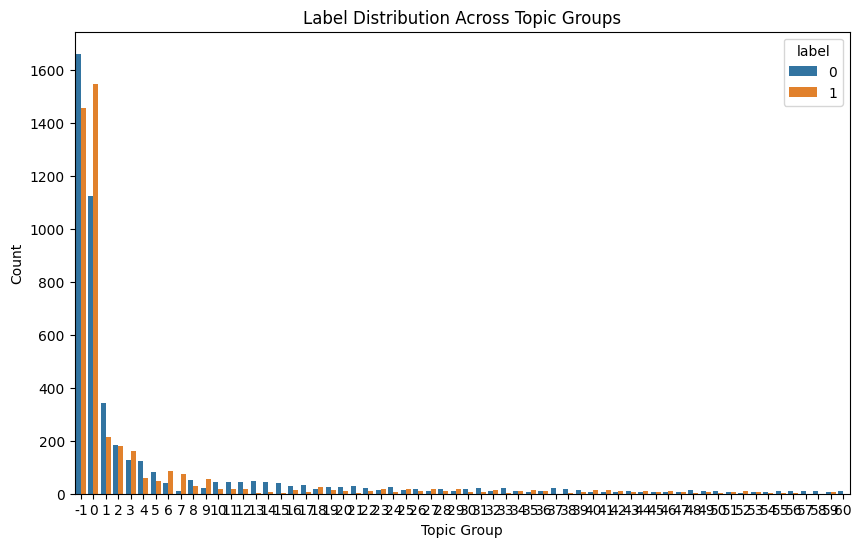

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='topic_group', y='count', hue='label')
plt.title('Label Distribution Across Topic Groups')
plt.xlabel('Topic Group')
plt.ylabel('Count')
plt.show()

## BERTopic - Hate Tweets Only

In [5]:
X_train = pd.Series(X_train)
Y_train = pd.Series(Y_train)

X_train_hate = X_train[Y_train == 1]

In [15]:
topic_model_hate = BERTopic(nr_topics='auto')
topics, probs = topic_model_hate.fit_transform(X_train_hate)
topic_model_hate.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1722,-1_binay_roxas_mar_duterte,"[binay, roxas, mar, duterte, nognog, hindi, di...",[tuwid daan daw mar roxas eh binti nga di nya ...
1,0,387,0_poe_grace_duterte_santiago,"[poe, grace, duterte, santiago, roxas, mar, mi...","[nakakainis grace poe, binay roxas duterte mir..."
2,1,286,1_pandak_mar_laki_roxas,"[pandak, mar, laki, roxas, hirap, nognog, haha...","[binay talaga nognog pandak laki hirap, hahaha..."
3,2,250,2_binay_hahaha_puro_hahahaha,"[binay, hahaha, puro, hahahaha, nog, sandro, h...",[ewan binay yes segway segway hala nasunog nog...
4,3,197,3_mar_roxas_daang_matuwid,"[mar, roxas, daang, matuwid, nako, nanalo, kor...","[hay nako mar roxas shut, wala akong ganang ma..."
5,4,180,4_binay_not_skin_fuck,"[binay, not, skin, fuck, look, burn, lonely, t...","[yes binay not us, not know people still belie..."
6,5,130,5_wala_laki_pandak_hindi,"[wala, laki, pandak, hindi, hirap, binay, di, ...",[wala kaming pake binay pandak ipagmalaki ung ...
7,6,118,6_commercial_tv_ads_nakakainis,"[commercial, tv, ads, nakakainis, ad, binay, t...","[punyeta talaga commercial binay nakakainis, t..."
8,7,85,7_annoying_ad_tv_political,"[annoying, ad, tv, political, campaign, ads, c...",[not know annoying mar roxas political ad bina...
9,8,77,8_corruption_corrupt_money_vs,"[corruption, corrupt, money, vs, cases, not, b...","[fuck binay answer corruption allegations, bin..."


In [16]:
topic_model_hate.visualize_topics() 

In [17]:
coherence_score = topic_model_hate.get_coherence()

AttributeError: 'BERTopic' object has no attribute 'get_coherence'

## TFIDF + NMF using Gensim - Hate Tweets Only

In [4]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_train_hate = X_train[Y_train == 1]
X_train_hate_tokenized = [sentence.split() for sentence in X_train_hate]

In [5]:
dct = Dictionary(X_train_hate_tokenized)
corpus = [dct.doc2bow(text) for text in X_train_hate_tokenized]

In [6]:
# Fit TFIDF Model
model = TfidfModel(corpus)
X_train_hate_tfidf = [model[corpus_bow] for corpus_bow in corpus]

In [7]:
# Fit NMF Model
nmf = Nmf(X_train_hate_tfidf, num_topics = 10)
hate_topics_per_tweet = nmf.get_document_topics(bow=X_train_hate_tfidf, normalize=True)

In [8]:
hate_topics = nmf.show_topics(num_topics=10,num_words=10,normalize=True)

In [9]:
topics_with_score = nmf.top_topics(corpus=X_train_hate_tfidf, texts=X_train_hate_tokenized, dictionary=dct, window_size=None, coherence='u_mass', topn=10, processes=-1)

In [10]:
for j in range(10):
    for i in range(10):
        topics_with_score[j][0][i] = list(topics_with_score[j][0][i])
        word_id = int(topics_with_score[j][0][i][1])
        word = dct.get(word_id)
        topics_with_score[j][0][i][1] = word
    

In [11]:
topics_with_score

[([[0.024024627299059055, 'pandak'],
   [0.01985030400709559, 'laki'],
   [0.01962513694586216, 'nognog'],
   [0.01960498712117026, 'di'],
   [0.018420725130389625, 'hirap'],
   [0.01704351078490318, 'haha'],
   [0.015973972280315565, 'fuck'],
   [0.009349442124424324, 'alam'],
   [0.009324293758379613, 'binay'],
   [0.007582756927504179, 'makati']],
  -4.258964037313113),
 ([[0.03713947001138832, 'ad'],
   [0.033507856833999754, 'nognog'],
   [0.012911870802061612, 'wala'],
   [0.011388313407716589, 'mar'],
   [0.010610398394758074, 'roxas'],
   [0.010278667702459048, 'puta'],
   [0.009459954929482796, 'annoying'],
   [0.00922905531435572, 'pandak'],
   [0.007704011531022659, 'hirap'],
   [0.00746267931697779, 'binay']],
  -4.389035769616502),
 ([[0.023485334342681914, 'hindi'],
   [0.014364151988893396, 'talaga'],
   [0.012401567778600178, 'president'],
   [0.010713497154472864, 'vice'],
   [0.010571218834339806, 'nognog'],
   [0.010290627758734336, 'binay'],
   [0.009313797569362755